# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 9 </span>  

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

## Cities on a circumference

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

plt.rcParams.update({'font.size': 21})
plt.rcParams["figure.figsize"]= (11,7)

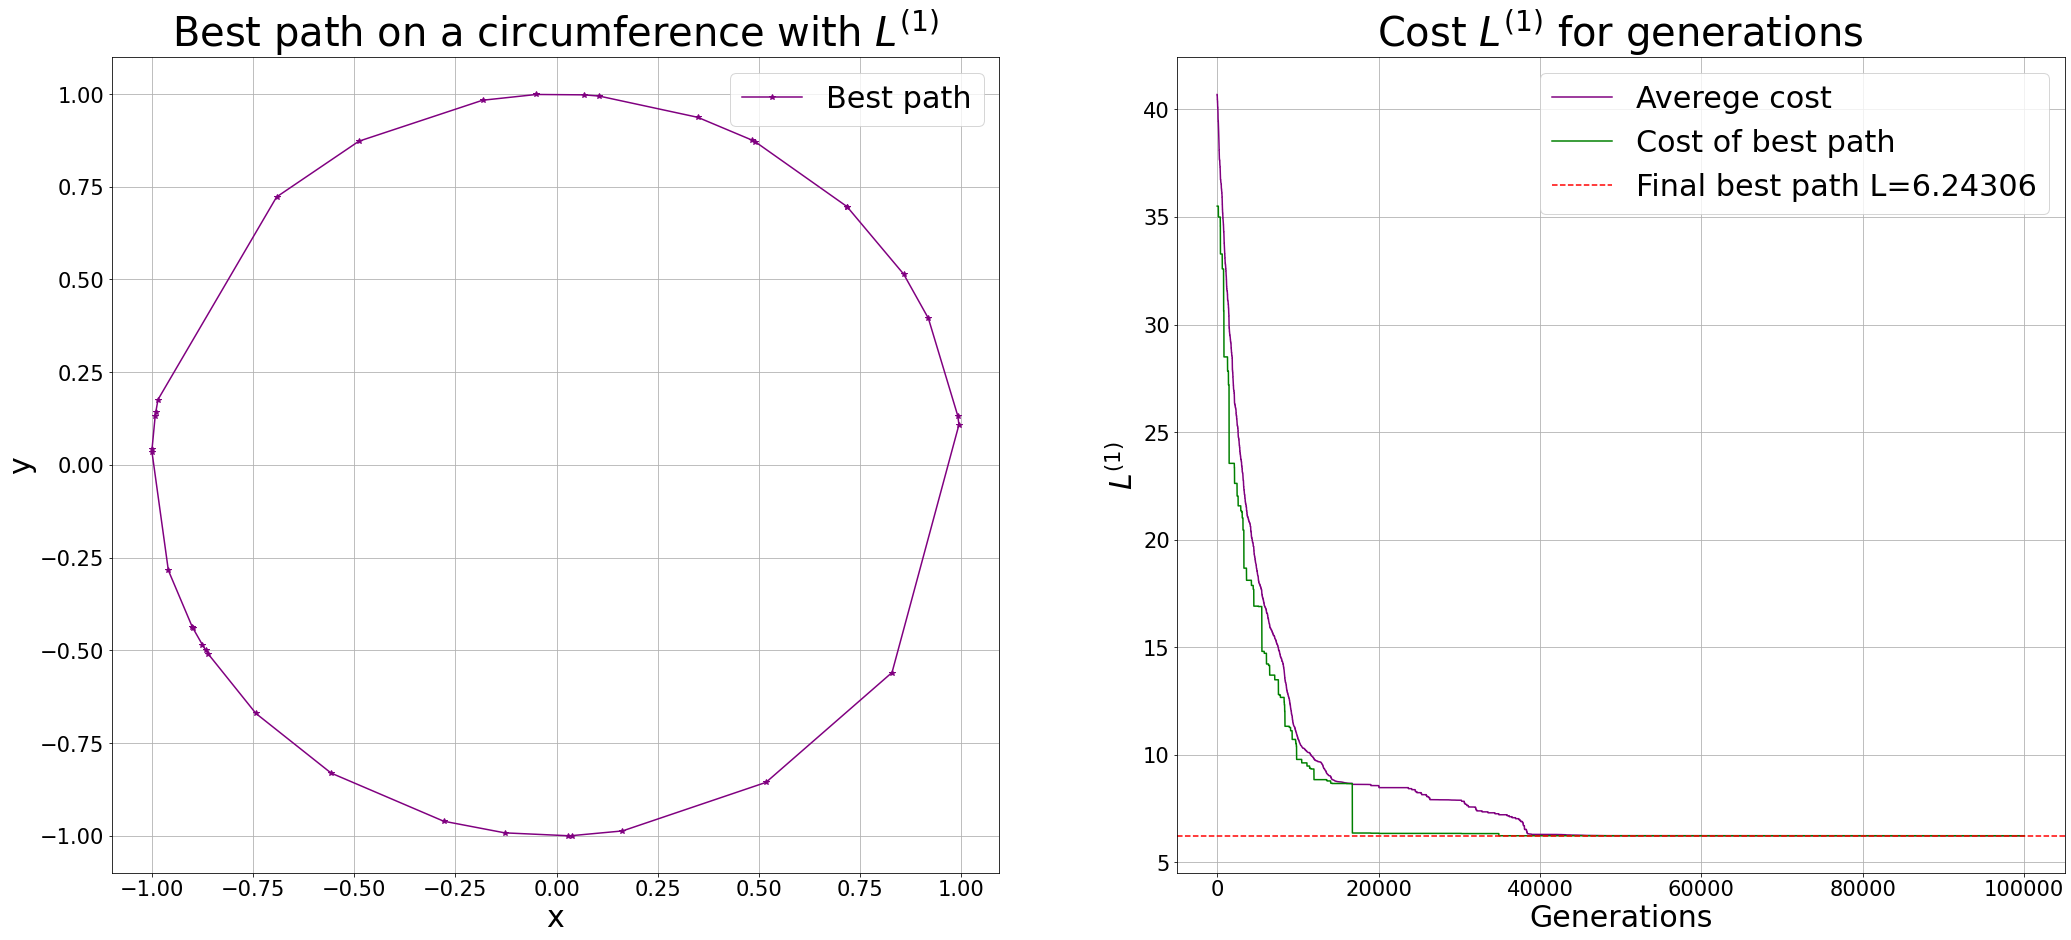

In [2]:
generations, L_best, half_L_best, err_h_L  = np.loadtxt("Results/averege_circ_half_L1.data", unpack=True, usecols=(0,1,2,3), delimiter=",")
pos_x, pos_y  = np.loadtxt("Results/best_circ_L1.data", unpack=True, usecols=(2,3), delimiter=",")

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(35 , 15))

ax0.plot(pos_x, pos_y, color="purple", marker="*", label='Best path')

ax0.set_xlabel(r'x', fontsize=30)
ax0.set_ylabel(r'y', fontsize=30)
ax0.grid(True)
ax0.set_title('Best path on a circumference with $L^{(1)}$',fontsize=40)
ax0.legend(loc=1, fontsize="x-large")

ax1.plot(generations[0:100000], half_L_best[0:100000], color="purple", label='Averege cost')
ax1.plot(generations[0:100000], L_best[0:100000], color="green", label='Cost of best path')
ax1.axhline(L_best[-1], label='Final best path L='+str(L_best[-1]), color='red', linestyle='--')

ax1.set_ylabel(r'$L^{(1)}$', fontsize=30)
ax1.set_xlabel(r'Generations', fontsize=30)
#ax1.set_xscale('log')

ax1.grid(True)
ax1.set_title(r'Cost $L^{(1)}$ for generations',fontsize=40)
ax1.legend(loc=1, fontsize="x-large")

plt.show()

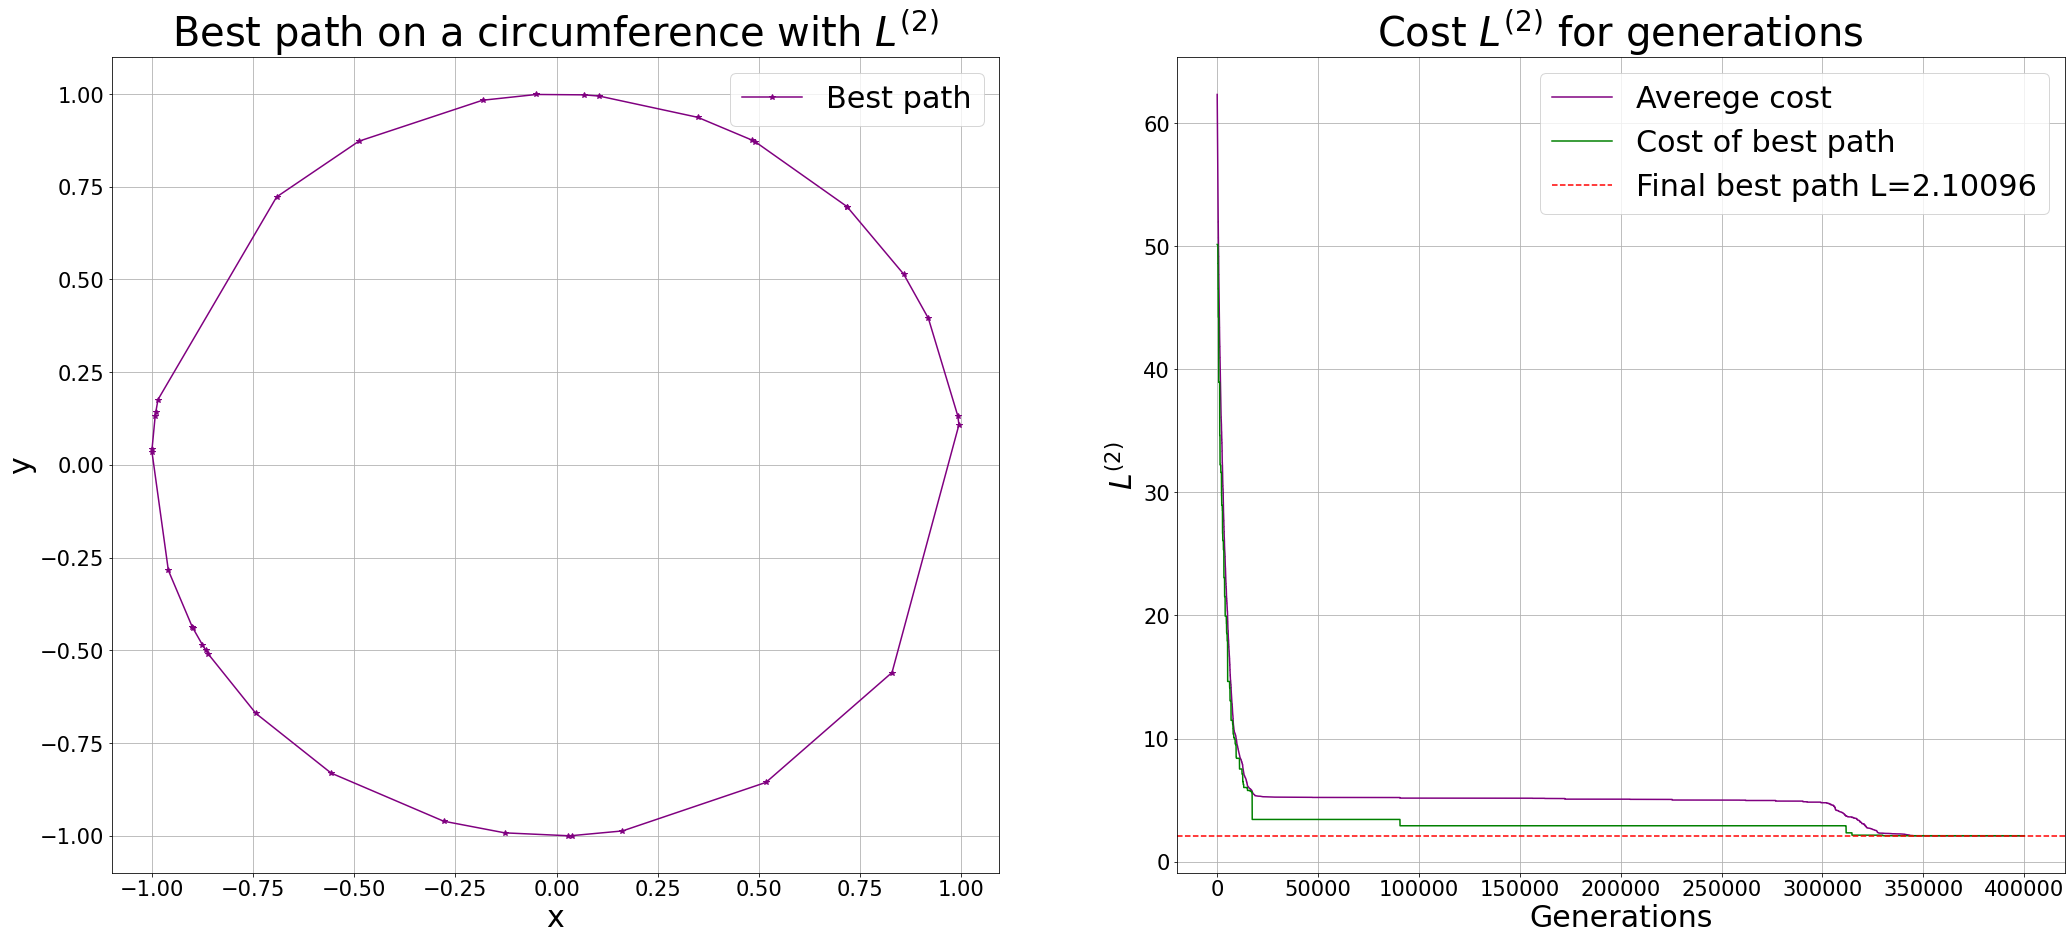

In [3]:
generations, L_best, half_L_best, err_h_L  = np.loadtxt("Results/averege_circ_half_L2.data", unpack=True, usecols=(0,1,2,3), delimiter=",")
pos_x, pos_y  = np.loadtxt("Results/best_circ_L2.data", unpack=True, usecols=(2,3), delimiter=",")

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(35 , 15))

ax0.plot(pos_x, pos_y, color="purple", marker="*", label='Best path')

ax0.set_xlabel(r'x', fontsize=30)
ax0.set_ylabel(r'y', fontsize=30)
ax0.grid(True)
ax0.set_title('Best path on a circumference with $L^{(2)}$',fontsize=40)
ax0.legend(loc=1, fontsize="x-large")

ax1.plot(generations[0:400000], half_L_best[0:400000], color="purple", label='Averege cost')
ax1.plot(generations[0:400000], L_best[0:400000], color="green", label='Cost of best path')
ax1.axhline(L_best[-1], label='Final best path L='+str(L_best[-1]), color='red', linestyle='--')

ax1.set_ylabel(r'$L^{(2)}$', fontsize=30)
ax1.set_xlabel(r'Generations', fontsize=30)
#ax1.set_xscale('log')

ax1.grid(True)
ax1.set_title(r'Cost $L^{(2)}$ for generations',fontsize=40)
ax1.legend(loc=1, fontsize="x-large")

plt.show()

I grafici riportano i risultati ottimali del problema del commesso vaggiatore co $N_{cities}=34$ poste su una circonferenza con centro nell'origine e $r=1$. L'ottimizzazione consiste nel minimizzare la funzione costo che descrive la distanza totale del porcorso dalla prima citta verso tutte le altre senza mai ritornare su una città visitata. Ho sscleto de funzioni costo per testare la bontà dell'algoritmo di ottimmizzazione:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

L'algoritmo usato è un Genteic Alogrithm (GA). Ho creato un Genome composto da $100 cromosomi$, formato da $34$ geni corrispondenti alle città, che ho fatto evolvere per $10^6$ generazioni. Ho quindi calcolato il costo per tutti i cromosomi e gli ho ordinati nel genoma in funzione del valore crescente del costo. Ad ogni generazione di evoluzione viene il genome puù andare incontro a mutazioni o cross evoluzione. Ad ogni tipo di evoluzione ho assegnato una probabilità che per le mutazioni randomiche ho fissato a $p_{mut}0.1$ e per l'accoppiamento tra cromosomi a $p=_{cross}0.6$. Viene così selezionato un cromosoma da migliorare tramite una operatore di selezione: $j= int(M \times r^p)+1$, dove $M=100$ sono il numero di cromosomi, $r$ è un numero casuale tra $0$ e $1$ e $p=0.2$ è la probabilità di accettazione. Con questo tipo di operatore vengono più falcimente selezionati i cromosomi migliori da mutare ed evolvere.
E' importante sottolineare che per eliminare ogni tipo di degenerazione dell'ottimizzazione ho fissato per ogni cromosoma la città iniziale.
Le mutazioni sono 4 tipi: permutazione fra m elementi consecutivi del cromosoma, shift di m elementi consecutivi in una posizione casuale all'interno del cromosoma stesso, shuffle di m eleementi casuali ed un inversione dell'ordine di m degli elementi. Il numero m elementi coinvolti ad ogni mutazione viene scelto in maniera casuale.
La cross-evoluzione invece seleziona due cromosmi particolarmente buoni e li combina creando due figli simili ai genitori. Questi figli non rimpiazzano i genitori ma solo i cromosomi peggiori.
In tutto questo ho inoltre creato un algoritmo che controllasse che le condizioni imposte da problema venissero rispettate ad ogni tipo di modifica al genoma.

In questo modo, con un gran numero di di generazioni ho potuto detemrniare il percosro migliore tra le città. Ho valutato inoltre anche il valore medio della funzione costo tra la metà migliore dei cromosomi disponibili ad ogni generazione.

Come mostrato nelle figure il percosro migliore segure la forma di un circonferza, come aspettato, ed il valor minimo del costo $L^{(1)}\sim 2\pi$. 

La scelta di effettuare solo un numero ristretto di modifiche per ciascuna generazione è stata puramente arbitraria; avrei potuto far evolvere gli individui per poche generazioni ma con un numero elevato di mutazioni e cross-evoluzioni per generazione.

## Cities in a square

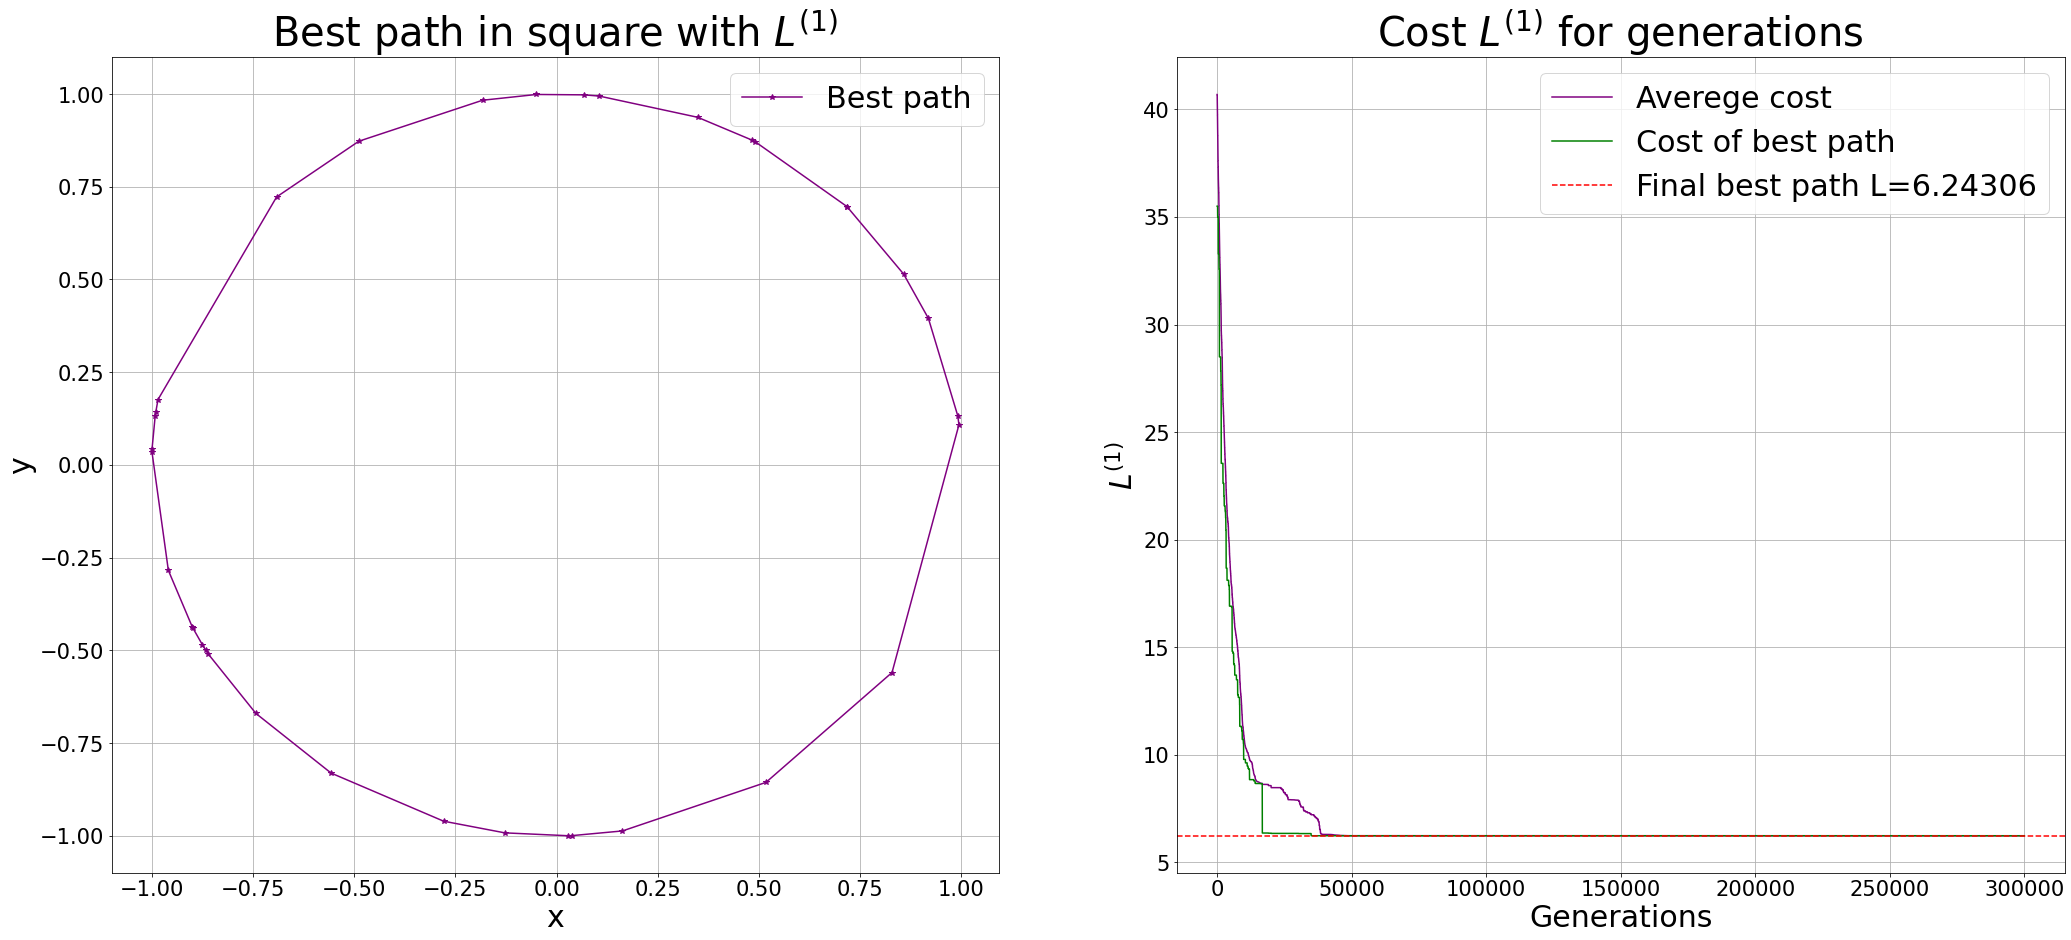

In [4]:
generations, L_best, half_L_best, err_h_L  = np.loadtxt("Results/averege_square_half_L1.data", unpack=True, usecols=(0,1,2,3), delimiter=",")
pos_x, pos_y  = np.loadtxt("Results/best_square_L1.data", unpack=True, usecols=(2,3), delimiter=",")

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(35 , 15))

ax0.plot(pos_x, pos_y, color="purple", marker="*", label='Best path')

ax0.set_xlabel(r'x', fontsize=30)
ax0.set_ylabel(r'y', fontsize=30)
ax0.grid(True)
ax0.set_title('Best path in square with $L^{(1)}$',fontsize=40)
ax0.legend(loc=1, fontsize="x-large")

ax1.plot(generations[0:300000], half_L_best[0:300000], color="purple", label='Averege cost')
ax1.plot(generations[0:300000], L_best[0:300000], color="green", label='Cost of best path')
ax1.axhline(L_best[-1], label='Final best path L='+str(L_best[-1]), color='red', linestyle='--')
ax1.set_ylabel(r'$L^{(1)}$', fontsize=30)
ax1.set_xlabel(r'Generations', fontsize=30)

ax1.grid(True)
ax1.set_title(r'Cost $L^{(1)}$ for generations',fontsize=40)
ax1.legend(loc=1, fontsize="x-large")

plt.show()

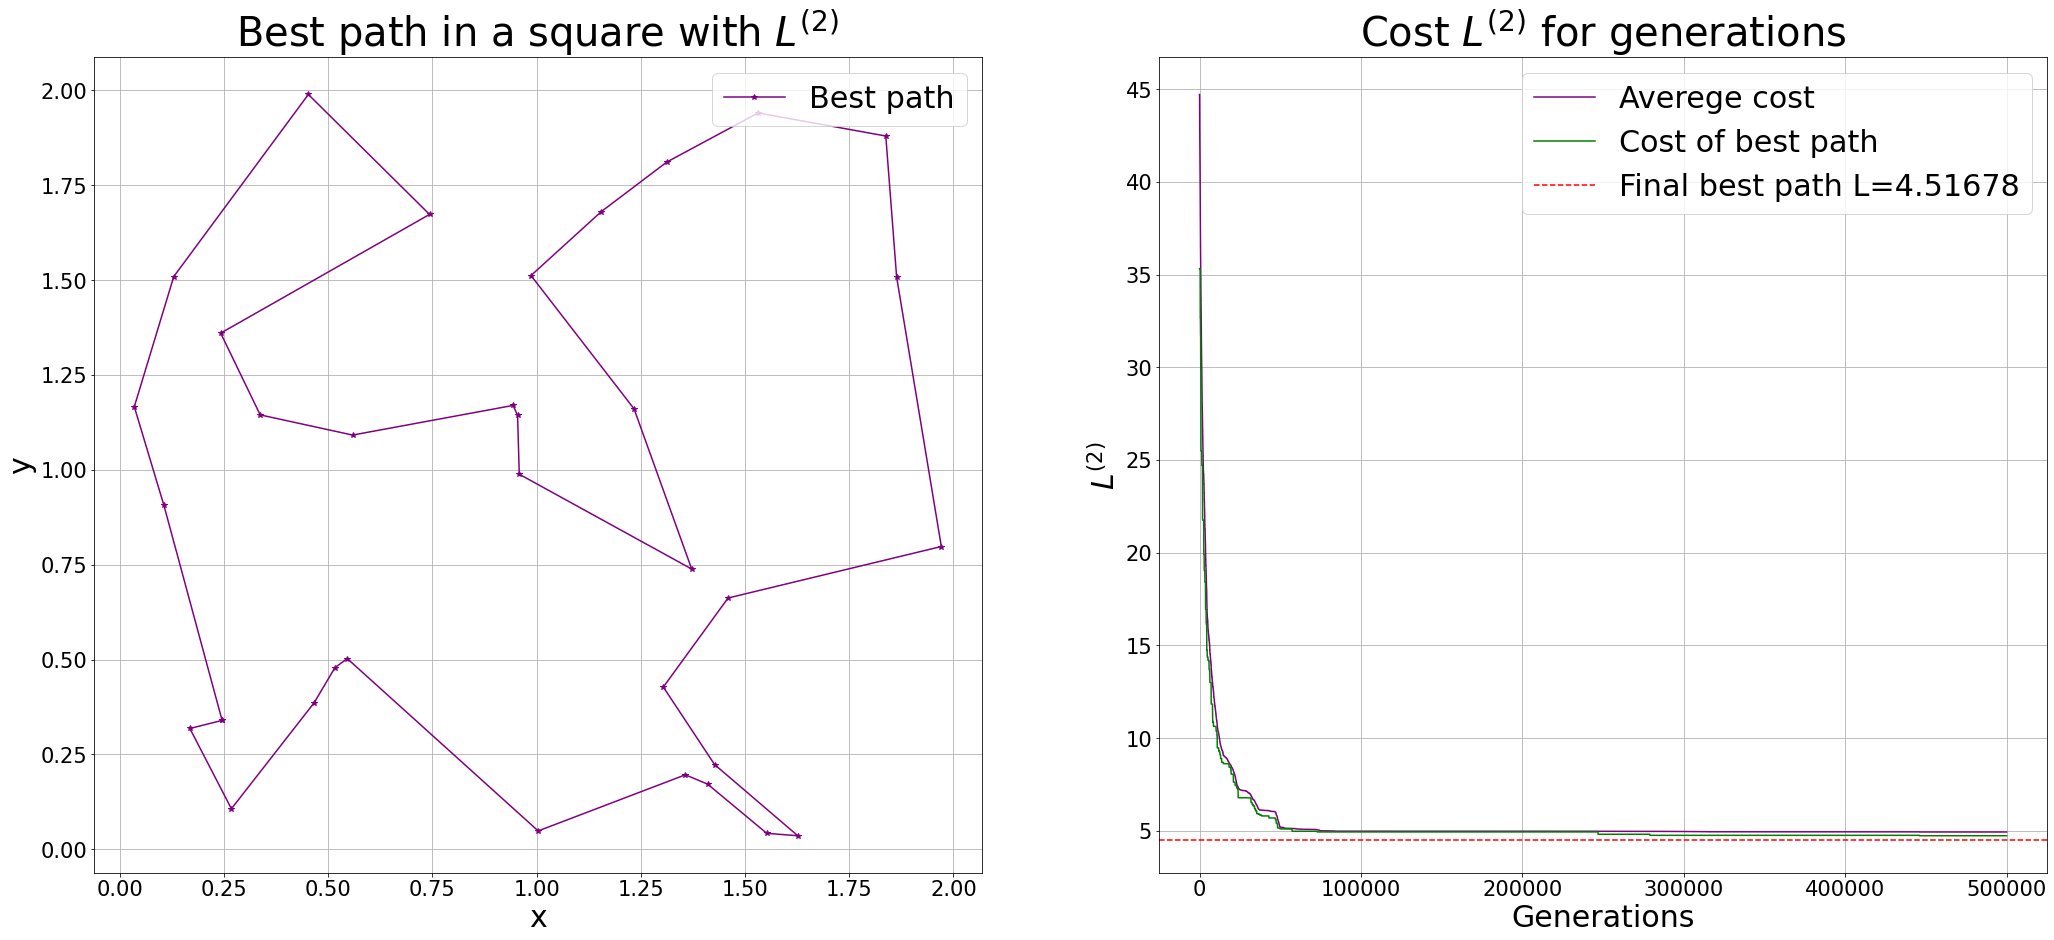

In [5]:
generations, L_best, half_L_best, err_h_L  = np.loadtxt("Results/averege_square_half_L2.data", unpack=True, usecols=(0,1,2,3), delimiter=",")
pos_x, pos_y  = np.loadtxt("Results/best_square_L2.data", unpack=True, usecols=(2,3), delimiter=",")

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(35 , 15))

ax0.plot(pos_x, pos_y, color="purple", marker="*", label='Best path')

ax0.set_xlabel(r'x', fontsize=30)
ax0.set_ylabel(r'y', fontsize=30)
ax0.grid(True)
ax0.set_title('Best path in a square with $L^{(2)}$',fontsize=40)
ax0.legend(loc=1, fontsize="x-large")

ax1.plot(generations[0:500000], half_L_best[0:500000], color="purple", label='Averege cost')
ax1.plot(generations[0:500000], L_best[0:500000], color="green", label='Cost of best path')
ax1.axhline(L_best[-1], label='Final best path L='+str(L_best[-1]), color='red', linestyle='--')

ax1.set_ylabel(r'$L^{(2)}$', fontsize=30)
ax1.set_xlabel(r'Generations', fontsize=30)
#ax1.set_xscale('log')

ax1.grid(True)
ax1.set_title(r'Cost $L^{(2)}$ for generations',fontsize=40)
ax1.legend(loc=1, fontsize="x-large")

plt.show()

Ho riutilizzato l'alogritmo per determinare questa volta il percorso migliore per lo stesso numero di citta disposte in un quadrato di lato $l=2$. 

A differenza del caso precedente i percorsi migliori trovati con le due funzioni costo non coincidono, seppur appaiano molti simili. Questo è dovuto sia alla maggiore complessita del problema da ottimizzare rispetto a quello precedente, sia ala dipendenza della funzione $L$ dalle distanze tra città. Un calcolo quaratico in un smplice problema linare sembra non essere l'ideale perchè la convergenza verso un valore minimo si ottiene solo dopo un numero di gnerazioni di evoluzione maggiore di $5\cdot10^5$. 

In questo caso la scelta del tipo di mutazioni implementate è stata fondamentale, scelte diverse avrebbero probabilmente trovato risultati simili ma non perfettamente uguali.